# Numerical Modeling
## 09/09/2019

## Lagrangia

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f_1 = lambda x: np.power(x, 3)
f_2 = lambda x: x / (1 + np.abs(x))

In [3]:
def plot_f(xs, fs, label, points=None):
    fig1, ax1 = plt.subplots(figsize=(10,10))
    ax1.plot(xs, fs, label=label)
    if points is not None:
        ax1.scatter(points[0], points[1], color="r", s=50)
    ax1.grid(True, which='both')
    ax1.axhline(y=0, color='k')
    ax1.axvline(x=0, color='k')
    plt.legend()

In [4]:
def plot_func(func, x_min, x_max, N, label, points=None):
    xs = np.linspace(x_min, x_max, N)
    fs = func(xs)
    plot_f(xs, fs, label, points)
    return xs, fs

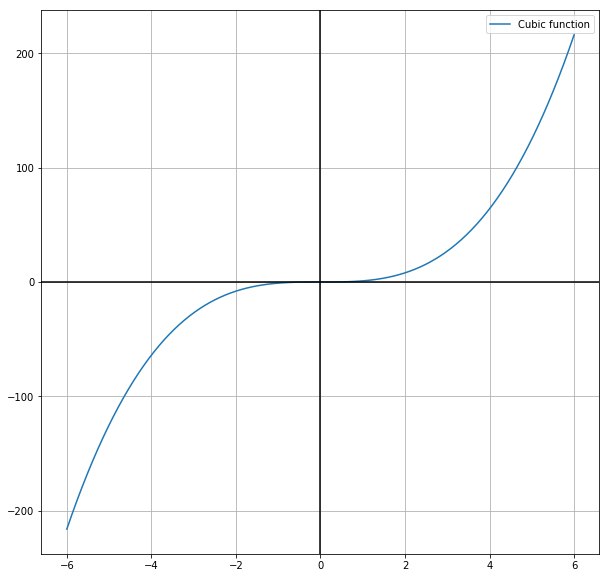

In [5]:
x1, f1 = plot_func(f_1, -6, 6, 100, 'Cubic function')

In [6]:
import json
class Ω():
    def __init__(self, xs, fs, template : list = None):
        if fs is None:
            self.xs, self.fs = xs, fs
        else:
            self.xs, self.fs = xs, fs
        if template is not None:
            self.xs_t, self.fs_t = [self.xs[i] for i in template], [self.fs[i] for i in template]
            
    def setT(self, template: list):
        self.xs_t, self.fs_t = [self.xs[i] for i in template], [self.fs[i] for i in template]
        
    def __repr__(self):
        return json.dumps(
            {
                "points": dict(zip(map(str, self.xs), map(str, self.fs))),
                "template": dict(zip(map(str, self.xs_t), map(str, self.fs_t))),
            },
            indent=4)

In [7]:
xs = [-1, 0, 1, 3, 4]
fs = [-1, 0, 1, 27, 64]
points = zip(
            xs,
            fs
        )

grid = Ω(xs, fs, template=[1, 2, 3])
print(grid)

{
    "points": {
        "-1": "-1",
        "0": "0",
        "1": "1",
        "3": "27",
        "4": "64"
    },
    "template": {
        "0": "0",
        "1": "1",
        "3": "27"
    }
}


In [8]:
class Lagrange():
    def __init__(self, grid: Ω):
        self.grid = grid
        self.substractions, self.coefs = self.pre_cacl()
    
    def setT(self, template: list):
        self.grid.setT(template=template)
        self.substractions, self.coefs = self.pre_cacl()
        
    def subtraction(self):
        return lambda xi, xs_t: lambda x: [(x-xj) for xj in xs_t if xj != xi]
    
    def pre_cacl(self):
        substractions = [(lambda xi, xs_t: lambda x: [(x-xj) for xj in xs_t if xj != xi])(xi, grid.xs_t) for xi in grid.xs_t]
        c1 = [self.mult(s[0](s[1])) for s in zip(substractions, self.grid.xs_t)]
        coefs = [(s[0]/s[1]) for s in zip(self.grid.fs_t, c1)]
        return substractions, coefs
    
    def mult(self, l):
        from functools import reduce
        return reduce((lambda x, y: x * y), l)
    
    def c2(self, x):
        return [self.mult(s[0](s[1])) for s in zip(self.substractions, [x] * 3)]
    
    def calc(self, x):
        return sum([s[0]*s[1] for s in zip(self.coefs, self.c2(x))])
    
    def __repr__(self):
        return "Giuseppe Ludovico Lagrangia"

In [9]:
l = Lagrange(grid)
print(l.calc(2))

10.0


In [10]:
l.setT(template=[2, 3, 4])
print(l.calc(2))

6.0


## Rational Sigmoid

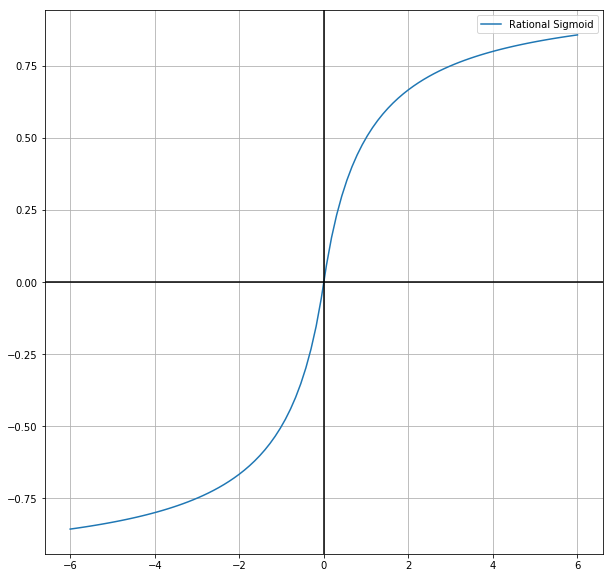

In [11]:
x2, f2, = plot_func(f_2, -6, 6, 100, 'Rational Sigmoid')

In [12]:
xs = [-6., -4., -2., 0., 2., 4., 6.]
fs = [f_2(x) for x in xs]
points = zip(xs, fs)
for p in points:
    print(p)

(-6.0, -0.8571428571428571)
(-4.0, -0.8)
(-2.0, -0.6666666666666666)
(0.0, 0.0)
(2.0, 0.6666666666666666)
(4.0, 0.8)
(6.0, 0.8571428571428571)


In [13]:
grid = Ω(xs, fs, template=[1, 2, 3])
print(grid)

{
    "points": {
        "-6.0": "-0.8571428571428571",
        "-4.0": "-0.8",
        "-2.0": "-0.6666666666666666",
        "0.0": "0.0",
        "2.0": "0.6666666666666666",
        "4.0": "0.8",
        "6.0": "0.8571428571428571"
    },
    "template": {
        "-4.0": "-0.8",
        "-2.0": "-0.6666666666666666",
        "0.0": "0.0"
    }
}


In [14]:
l = Lagrange(grid)
left_xs = x2[:50]
left_L = [l.calc(x) for x in left_xs]
left_zero_L = l.calc(0.0)

In [15]:
l.setT(template=[3, 4, 5])

In [16]:
l = Lagrange(grid)
right_xs = x2[50:]
right_L = [l.calc(x) for x in right_xs]
right_zero_L = l.calc(0.0)

In [17]:
graphs = [[x2, f2, "Rational Sigmoid"], [left_xs, left_L, "Left L2"], [right_xs, right_L, "Right L2"]]

In [18]:
def plot_all(data, scatters=None):
    from itertools import cycle
    cycol = cycle('bgrcmk')
    fig1, ax1 = plt.subplots(figsize=(10,10))
    for graph in data:
        x, f, label = graph[0], graph[1], graph[2]
        ax1.plot(x, f, c=next(cycol), label=label)
    if scatters is not None:
        xs, fs = scatters[0], scatters[1]
        ax1.scatter(xs, fs, color="red", s=50)
    ax1.grid(True, which='both')
    ax1.axhline(y=0, color='k')
    ax1.axvline(x=0, color='k')
    plt.legend()

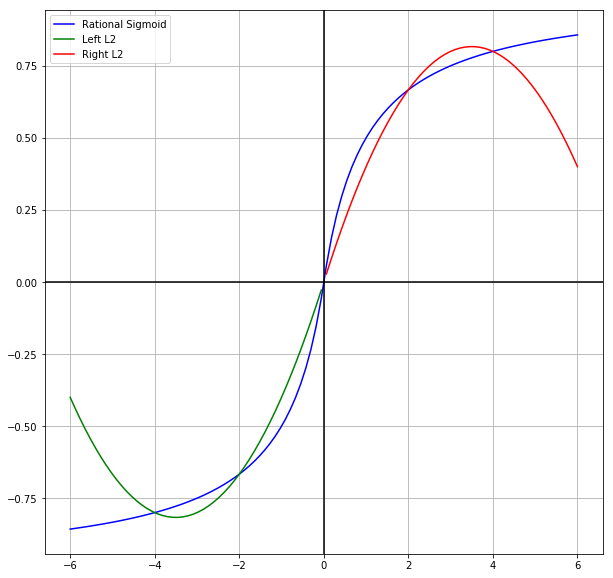

In [19]:
plot_all(graphs)

In [20]:
right_L[:1]

[0.028037955310682556]

In [21]:
left_L[-1:]

[-0.028037955310682556]

In [22]:
left_zero_L

0.0

In [23]:
right_zero_L

0.0

## Cubic function

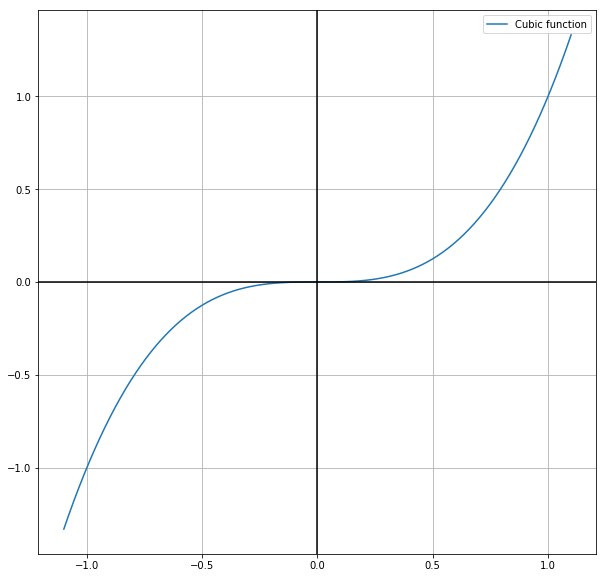

In [24]:
x1, f1 = plot_func(f_1, -1.1, 1.1, 100, 'Cubic function')

In [25]:
xs = [-1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
fs = [f_1(x) for x in xs]
grid = Ω(xs, fs, template=[3, 4, 5])
print(grid)

{
    "points": {
        "-1.1": "-1.3310000000000004",
        "-0.9": "-0.7290000000000001",
        "-0.7": "-0.3429999999999999",
        "-0.5": "-0.125",
        "-0.3": "-0.026999999999999996",
        "-0.1": "-0.0010000000000000002",
        "0.1": "0.0010000000000000002",
        "0.3": "0.026999999999999996",
        "0.5": "0.125",
        "0.7": "0.3429999999999999",
        "0.9": "0.7290000000000001",
        "1.1": "1.3310000000000004"
    },
    "template": {
        "-0.5": "-0.125",
        "-0.3": "-0.026999999999999996",
        "-0.1": "-0.0010000000000000002"
    }
}


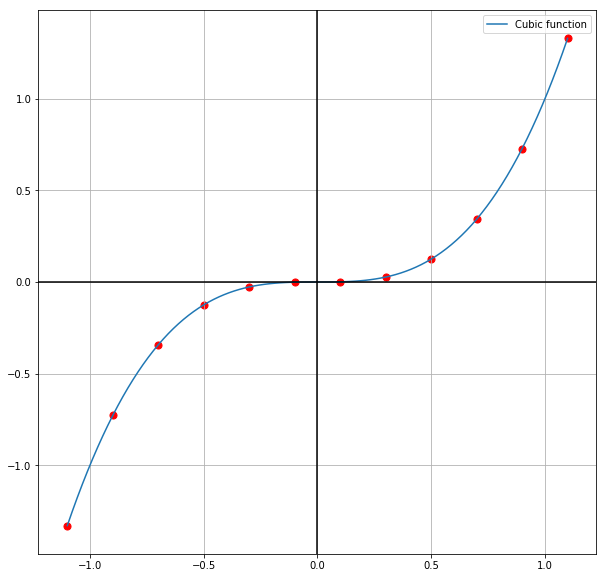

In [26]:
x1, f1 = plot_func(f_1, -1.1, 1.1, 100, 'Cubic function', (xs, fs))

In [27]:
l = Lagrange(grid)
left_L = [l.calc(x) for x in x1]
left_junction_L = l.calc(-0.1)
left_zero_L = l.calc(-0.0)

l.setT(template=[5, 6, 7])

l = Lagrange(grid)
right_L = [l.calc(x) for x in x1]
right_junction_L = l.calc(-0.1)
right_zero_L = l.calc(0.0)

graphs = [[x1,f1, "Cubic Sigmoid"],[x1, left_L, "$Left L_2$"],[x1, right_L, "$Right L_2$"]]
scatters = [xs, fs]

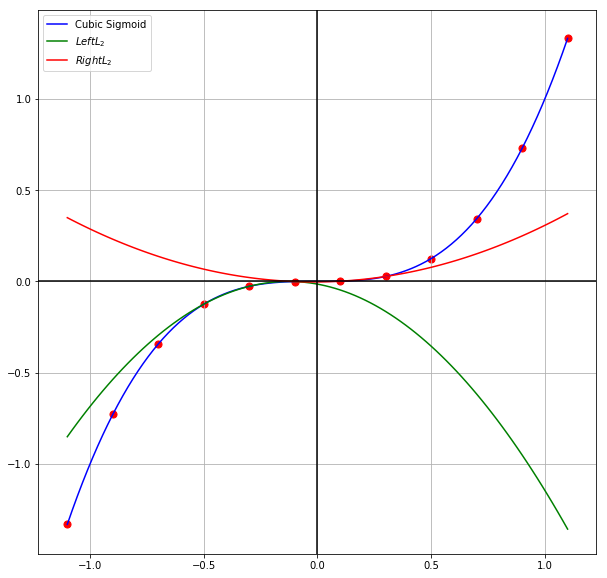

In [28]:
plot_all(graphs, scatters)

In [29]:
print(left_junction_L)
print(left_zero_L)
print(right_junction_L)
print(right_zero_L)

-0.0010000000000000002
-0.014999999999999998
-0.0010000000000000002
-0.003


In [30]:
(left_junction_L + right_junction_L) * 0.5

-0.0010000000000000002

In [31]:
print(f_1(-0.1))

-0.0010000000000000002


## $x \cdot sin(x^3)$

In [32]:
f_3 = lambda x: x*np.sin(np.power(x, 3))
xs = [-1.0, -0.6, -0.2, 0.2, 0.6, 1.0, 1.4]
fs = [f_3(x) for x in xs]

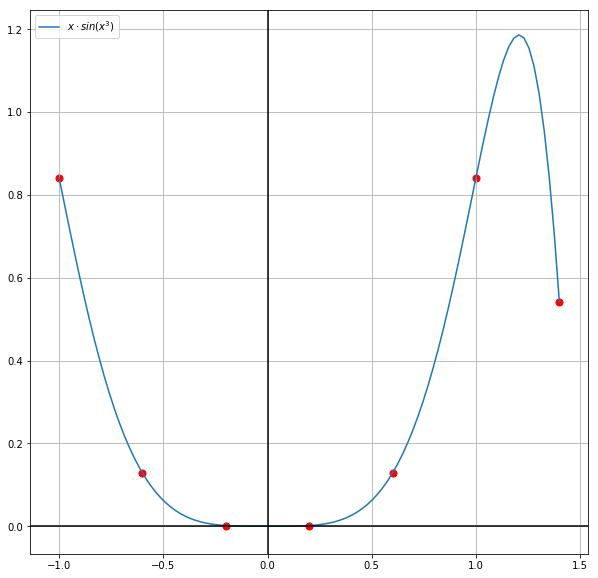

In [33]:
x3, f3 = plot_func(f_3, -1.0, 1.4, 100, '$x \cdot sin(x^3)$', (xs, fs))

In [34]:
T_1 = [0, 1, 2]
T_2 = [2, 3, 4]

grid = Ω(xs, fs, template=T_1)

In [35]:
l = Lagrange(grid)

x3l1 = [x for x in x3 if x <= -0.15]
l1 = [l.calc(x) for x in x3l1]

l1_junktion = l.calc(-0.2)

x1l1, x2l1 = -0.25, -0.15
y1l1, y2l1 = l.calc(x1l1), l.calc(x2l1)

l.setT(template=T_2)


x3l2 = [x for x in x3 if x >= -0.25 and x <= 1.0]
l2 = [l.calc(x) for x in x3l2]

l2_junktion = l.calc(-0.2)

x1l2, x2l2 = -0.25, -0.15
y1l2, y2l2 = l.calc(x1l2), l.calc(x2l2)

graphs = [[x3, f3, "$x \cdot sin(x^3)$"],[x3l1, l1, "$L1_2$"],[x3l2, l2, "$L2_2$"]]
scatters = [xs, fs]

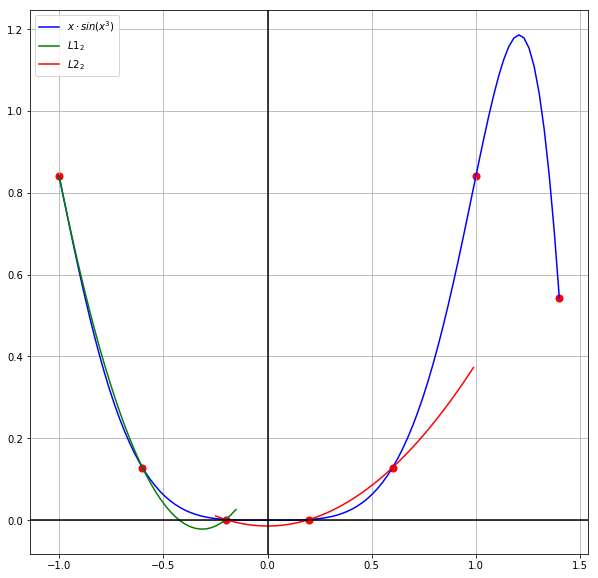

In [36]:
plot_all(graphs, scatters)

In [37]:
y = lambda x1, x2, y1, y2: lambda x: y1 + (x - x1)*(y2 - y1)/(x2-x1)

In [38]:
print(x1l1, x2l1, y1l1, y2l1)

-0.25 -0.15 -0.014566104095291868 0.026920473248179328


In [39]:
print(x1l2, x2l2, y1l2, y2l2)

-0.25 -0.15 0.010529290449287652 -0.005345034023422939


In [40]:
y1 = y(x1l1, x2l1, y1l1, y2l1)
y2 = y(x1l2, x2l2, y1l2, y2l2)

In [41]:
xs1 = np.linspace(-0.5, -0.2)
xs2 = np.linspace(-0.2, 0.5)
y1s = y1(xs1)
y2s = y2(xs2)

## Derivative

In [42]:
graphs = [
    [x3, f3, "$x \cdot sin(x^3)$"],
    [x3l1, l1, "First L2"],
    [x3l2, l2, "Second L2"], 
    [xs1, y1s, "$L1_{2}^{'}$"],
    [xs2, y2s, "$L2_{2}^{'}$"]
]
scatters = [xs, fs]

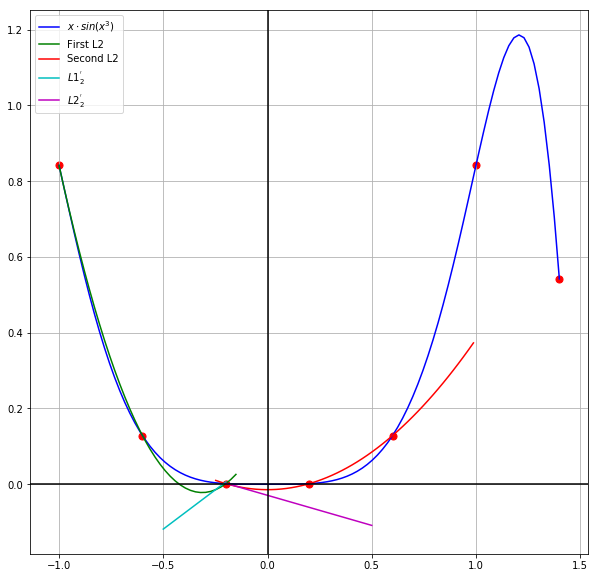

In [43]:
plot_all(graphs, scatters)

In [44]:
l1_junktion

0.001599982933387947

In [45]:
l2_junktion

0.001599982933387947